In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [30]:
m = 2
b = 0.5
x = np.linspace(0,4, 100)
y =m * x + b + np.random.randn(*x.shape) + 0.25

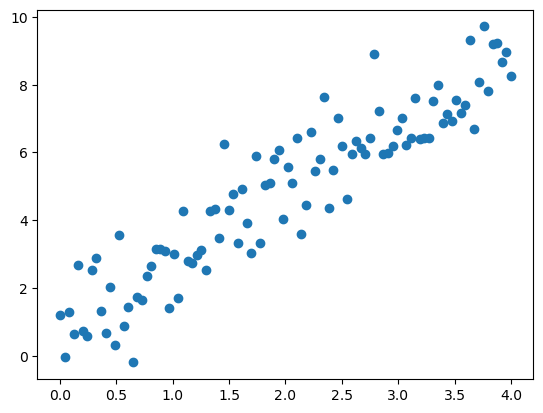

In [31]:
plt.scatter(x,y)

In [32]:
class Model:
    def __init__(self):
        self.weight = tf.Variable(10.0)
        self.bias = tf.Variable(10.0)
    
    def __call__(self,x):
        return self.weight * x + self.bias
# self.weight.assign_sub(15.0)

In [33]:
def calculate_loss(y_actual, y_output):
    return tf.reduce_mean(tf.square(y_actual - y_output))

In [34]:
def train(model, x, y, learning_rate):
    with tf.GradientTape() as gt:
        y_output = model(x)
        loss = calculate_loss(y, y_output)
        
    new_weight, new_bias = gt.gradient(loss, [model.weight, model.bias])
    model.weight.assign_sub(new_weight * learning_rate)
    model.bias.assign_sub(new_weight * learning_rate)

In [35]:
model = Model()
epochs = 100
learning_rate = 0.15

for epoch in range(epochs):
    y_output = model(x)
    loss = calculate_loss(y, y_output)
    print(f"Epocs : {epoch}, loss: {loss.numpy()} ")
    train(model, x, y , learning_rate)

Epocs : 0, loss: 721.5068969726562 
Epocs : 1, loss: 1043.6475830078125 
Epocs : 2, loss: 1533.438232421875 
Epocs : 3, loss: 2224.54150390625 
Epocs : 4, loss: 3261.841552734375 
Epocs : 5, loss: 4741.111328125 
Epocs : 6, loss: 6941.87548828125 
Epocs : 7, loss: 10103.2705078125 
Epocs : 8, loss: 14778.2509765625 
Epocs : 9, loss: 21527.435546875 
Epocs : 10, loss: 31466.69921875 
Epocs : 11, loss: 45865.0 
Epocs : 12, loss: 67008.765625 
Epocs : 13, loss: 97710.140625 
Epocs : 14, loss: 142707.375 
Epocs : 15, loss: 208149.6875 
Epocs : 16, loss: 303937.03125 
Epocs : 17, loss: 443400.25 
Epocs : 18, loss: 647345.1875 
Epocs : 19, loss: 944506.0625 
Epocs : 20, loss: 1378790.375 
Epocs : 21, loss: 2011898.375 
Epocs : 22, loss: 2936754.0 
Epocs : 23, loss: 4285502.5 
Epocs : 24, loss: 6255201.5 
Epocs : 25, loss: 9128385.0 
Epocs : 26, loss: 13323515.0 
Epocs : 27, loss: 19443906.0 
Epocs : 28, loss: 28379056.0 
Epocs : 29, loss: 41416308.0 
Epocs : 30, loss: 60447560.0 
Epocs : 31,

In [36]:
print(model.weight.numpy())
print(model.bias.numpy())

1348095500.0
1348095500.0


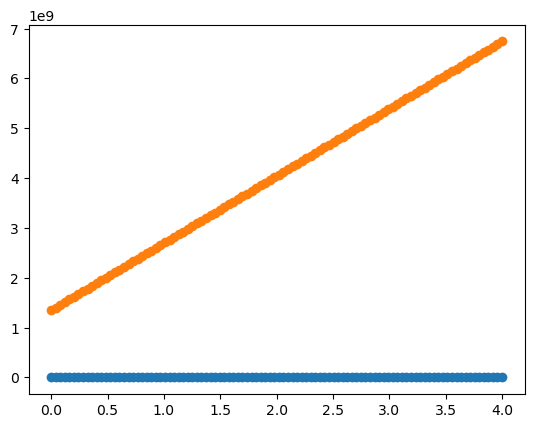

In [37]:
new_x = np.linspace(0,4, 100)
new_y =model.weight.numpy() * new_x + model.bias.numpy() 
plt.scatter(x,y)
plt.scatter(new_x, new_y)